In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import ot
import os

from dtmrpy import DT_GMM, log_map, proj_map, barycentric_projection_2_vector, vector_2_barycentric_projection, get_tract_data

device='cuda'

INFO: Using numpy backend


In [2]:
df = pd.read_pickle('D:DTMRI/HCP/dtmri_dataframe_hcp_adult_1064.pkl') 
df = df.dropna(subset=df.columns[2:-1],how='all').copy()
df.reset_index(inplace=True, drop=True)
df


KeyboardInterrupt



In [3]:
tract = 'Fornix_L'
barycenter = np.load("data_files/hcp/"+tract+"_barycenter.npy", allow_pickle=True).item()

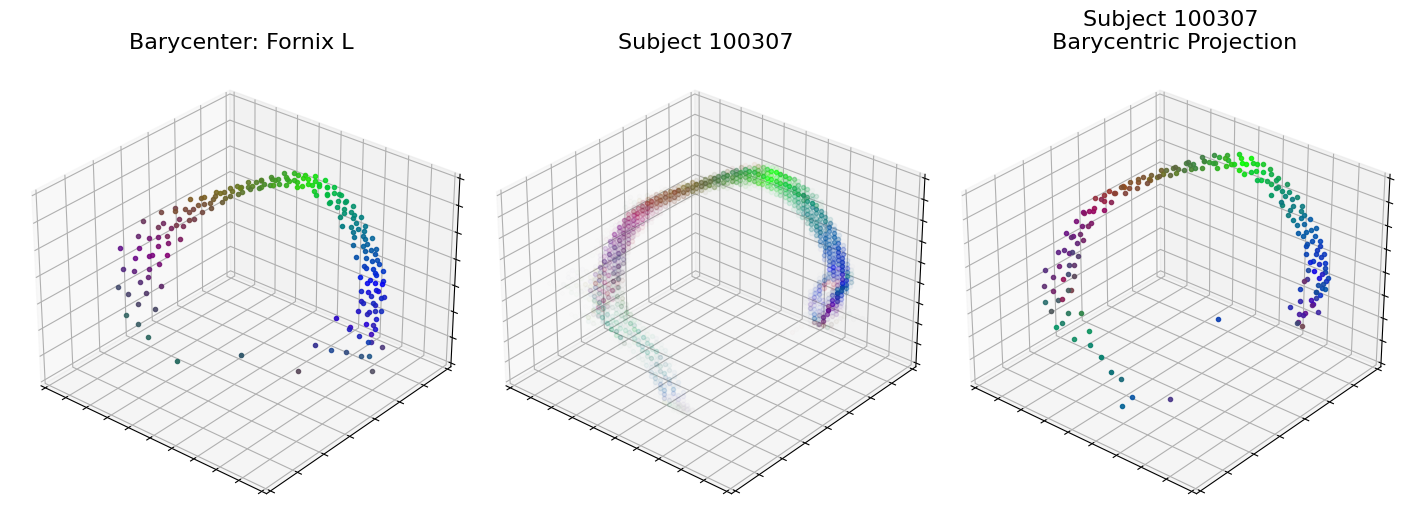

In [4]:
el=30
az=130
fig = plt.figure(figsize=(18,6))

fig.add_subplot(131,projection='3d')
barycenter.plot()
plt.title("Barycenter: Fornix L", fontsize=16)
plt.gca().view_init(el,az)
plt.gca().set_xticks(plt.gca().get_xticks(),labels=[])
plt.gca().set_yticks(plt.gca().get_yticks(),labels=[])
plt.gca().set_zticks(plt.gca().get_zticks(),labels=[])

fig.add_subplot(132,projection='3d')
df[tract][1].plot()
plt.title("Subject "+str(df['sid'][1]), fontsize=16)
plt.gca().view_init(el,az)
plt.gca().set_xticks(plt.gca().get_xticks(),labels=[])
plt.gca().set_yticks(plt.gca().get_yticks(),labels=[])
plt.gca().set_zticks(plt.gca().get_zticks(),labels=[])

barycentric_projection = proj_map([log_map(df[tract][1], barycenter)],barycenter)[0]

fig.add_subplot(133,projection='3d')
barycentric_projection.plot()
plt.title("Subject "+str(df['sid'][1]+ "\n Barycentric Projection"), fontsize=16)
plt.gca().view_init(el,az)
plt.gca().set_xticks(plt.gca().get_xticks(),labels=[])
plt.gca().set_yticks(plt.gca().get_yticks(),labels=[])
plt.gca().set_zticks(plt.gca().get_zticks(),labels=[])

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

# plt.savefig("Fornix_L.png", bbox_inches='tight')

In [9]:
barycentric_projection_list = [log_map(subject, barycenter) for subject in df[tract].dropna()[:50]]
reconstruction_list = proj_map(barycentric_projection_list, barycenter)

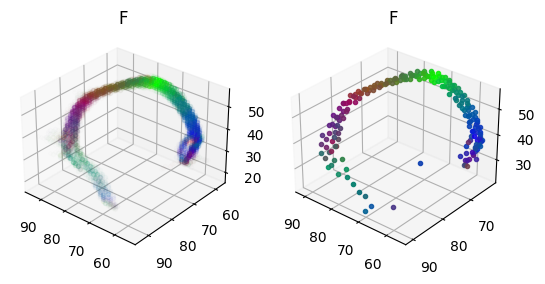

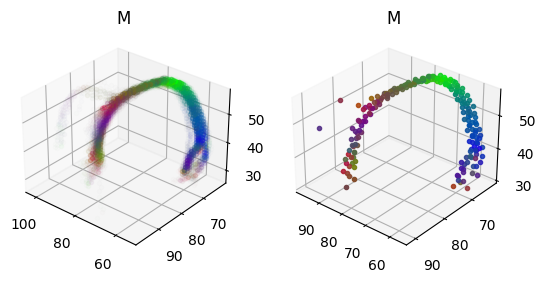

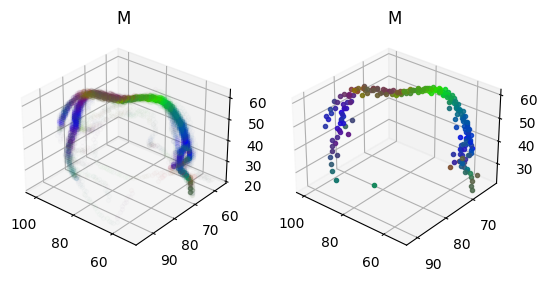

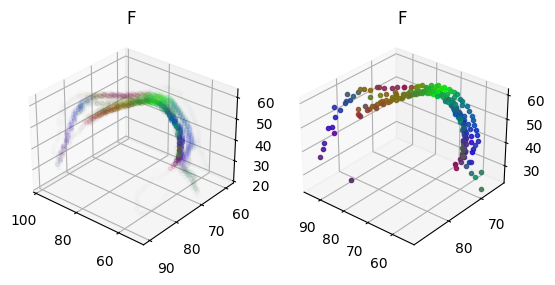

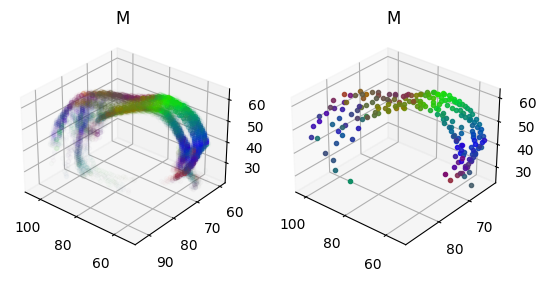

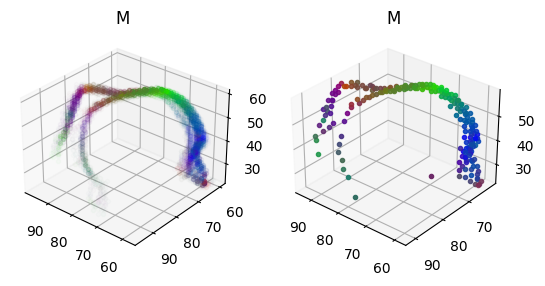

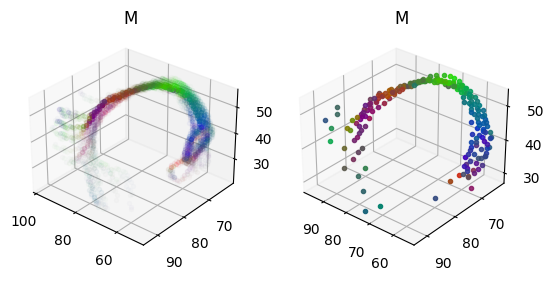

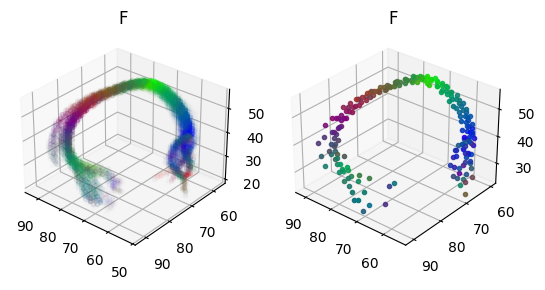

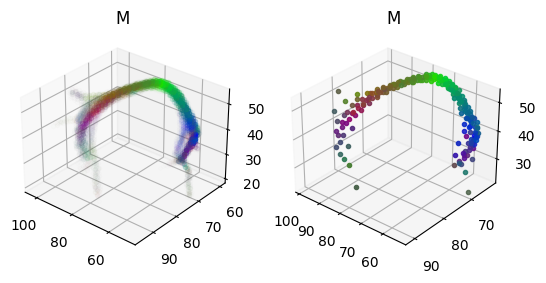

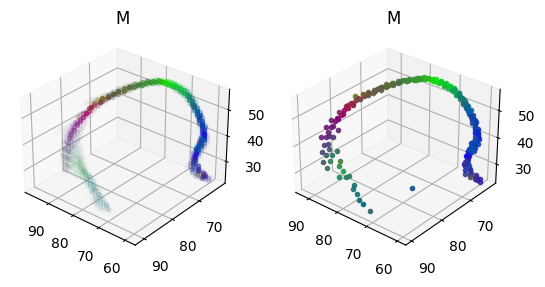

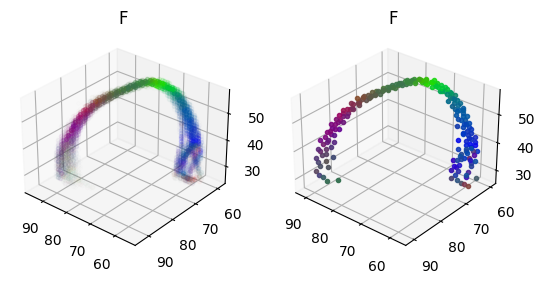

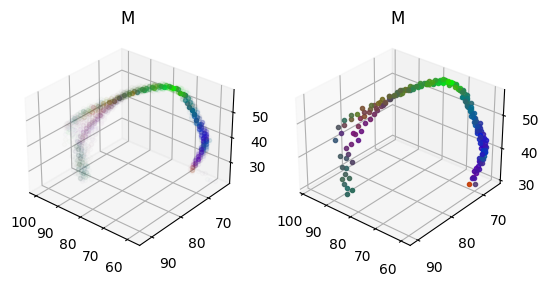

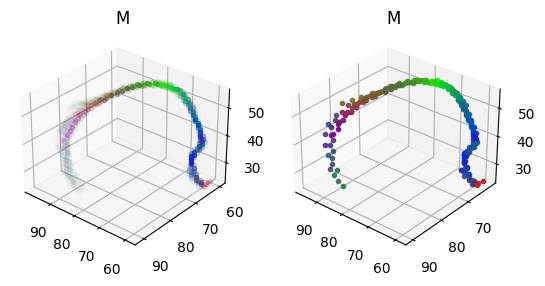

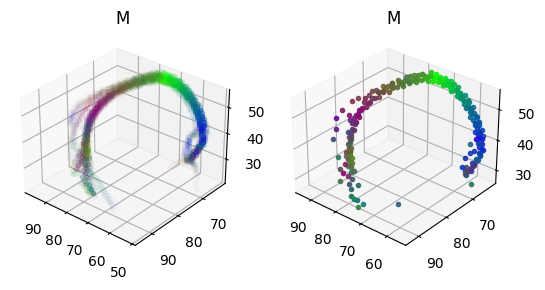

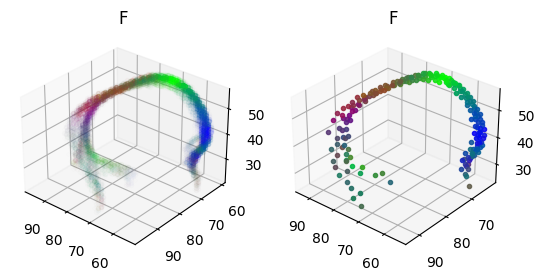

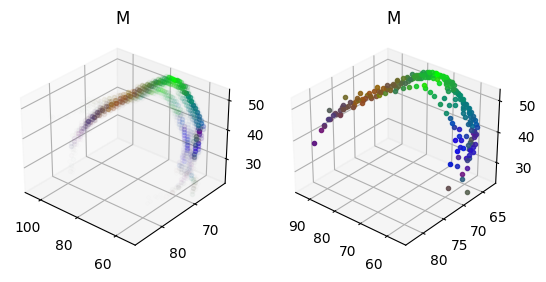

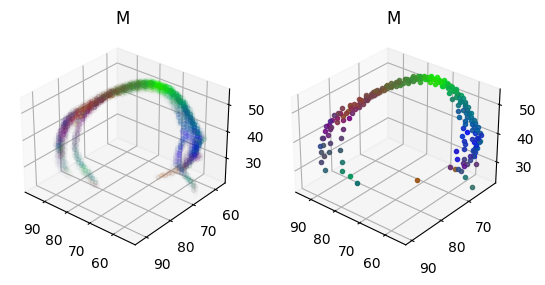

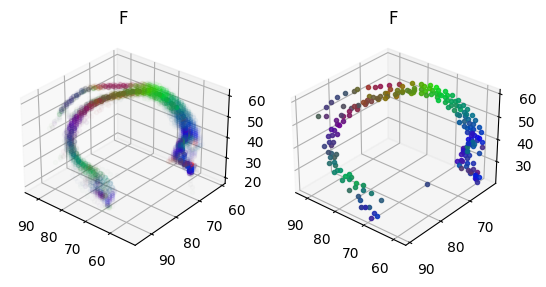

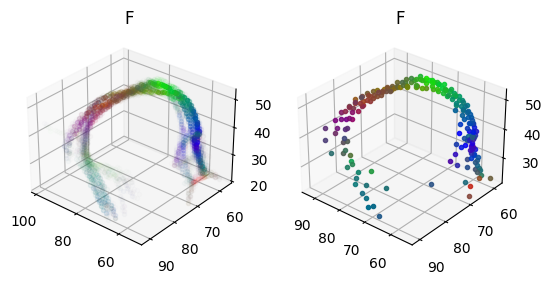

C:\Users\micha\Documents\GitHub\Research\DTMRI\ADNI\dtmrpy\dtmrpy.py:91: RuntimeWarning: invalid value encountered in divide
  plt.plot(x,y,z,'.',c=rgb/sum(rgb), alpha = w[i][0])


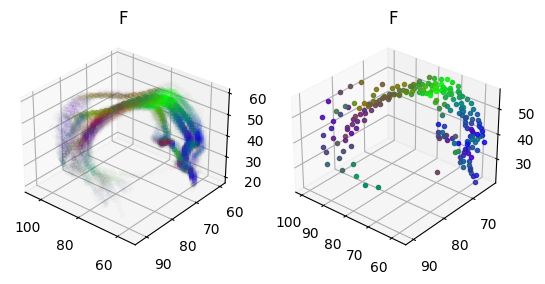

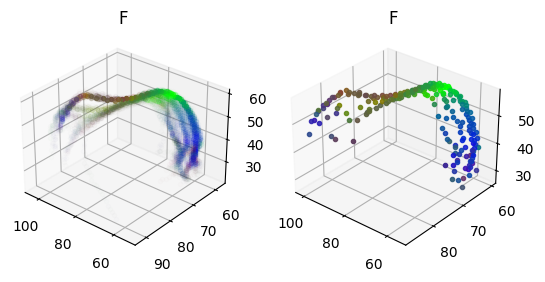

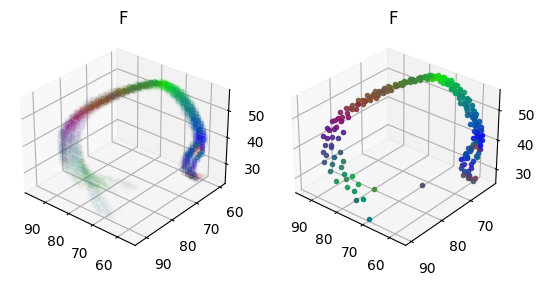

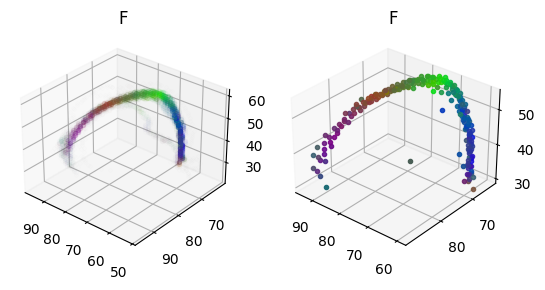

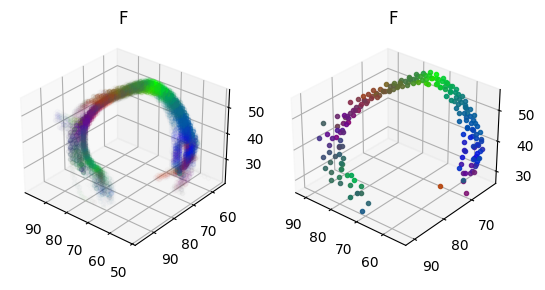

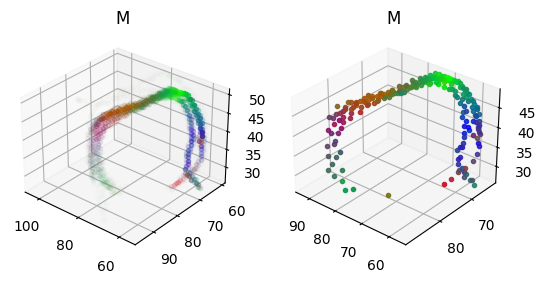

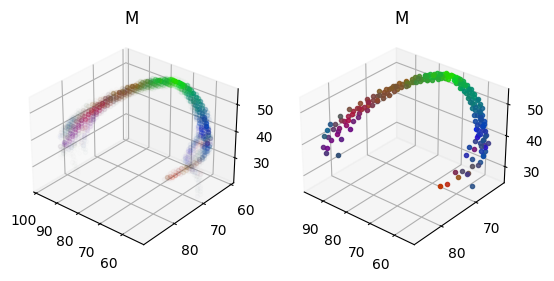

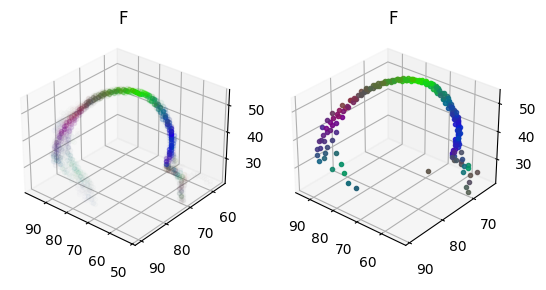

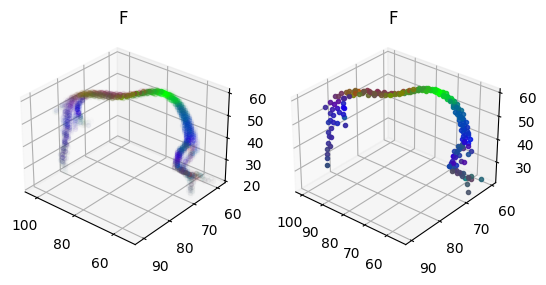

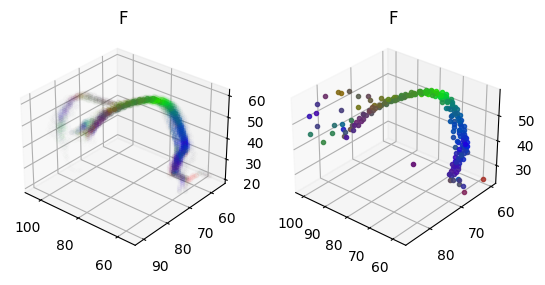

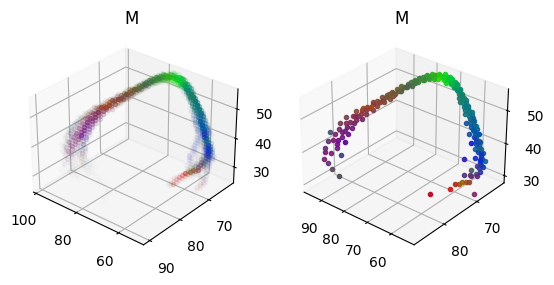

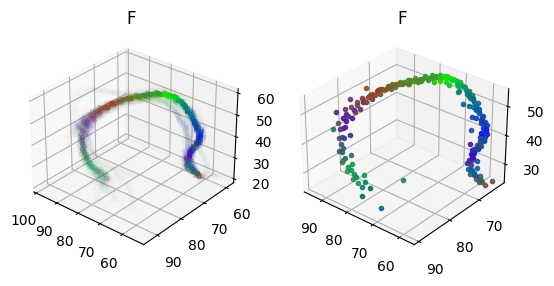

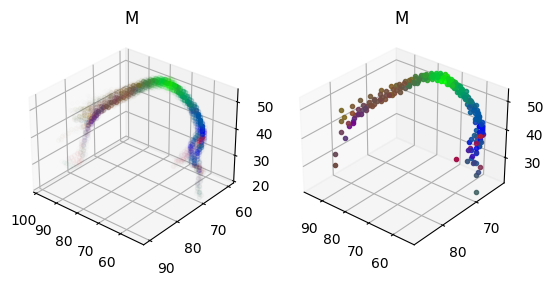

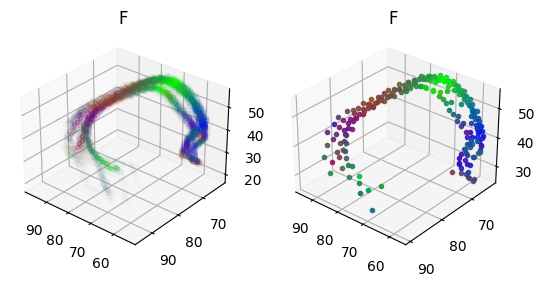

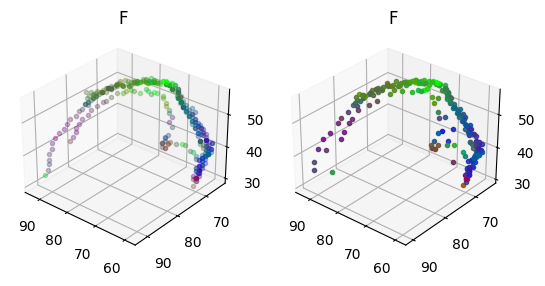

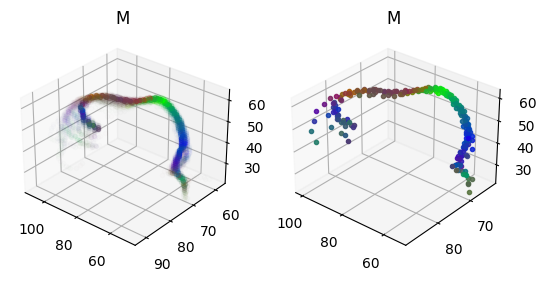

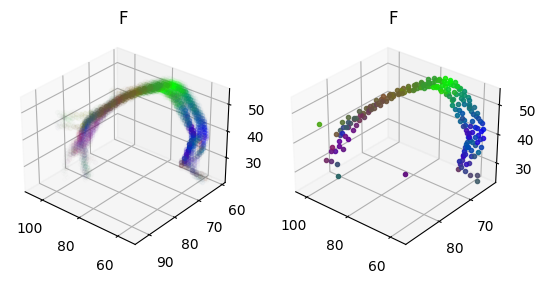

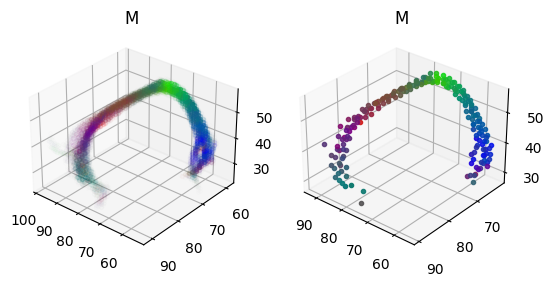

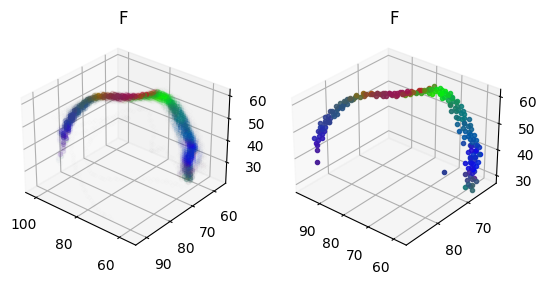

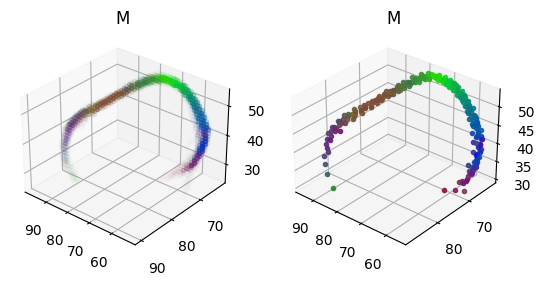

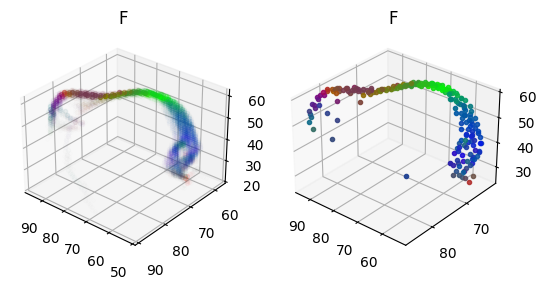

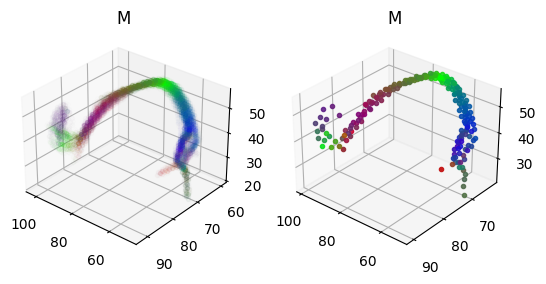

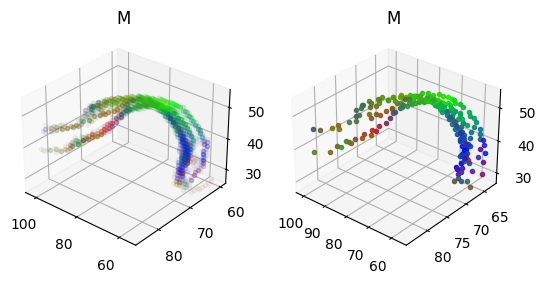

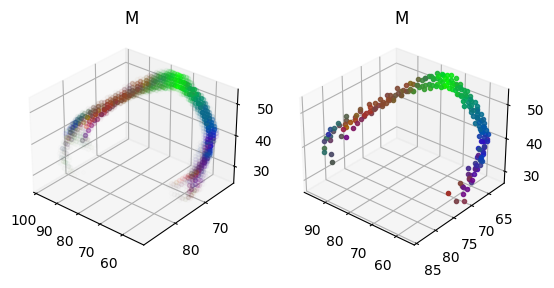

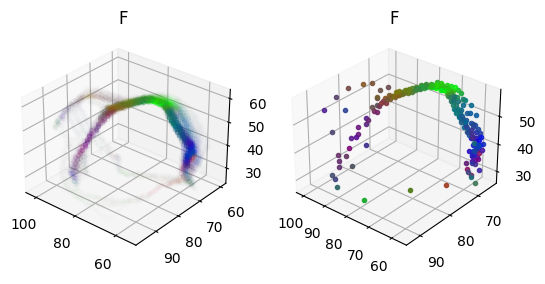

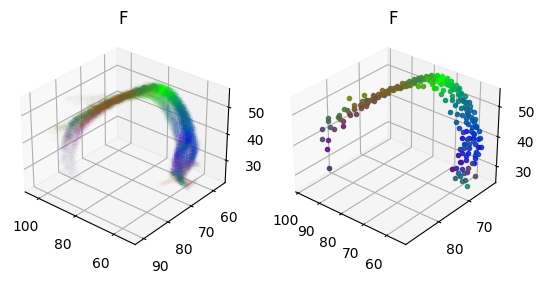

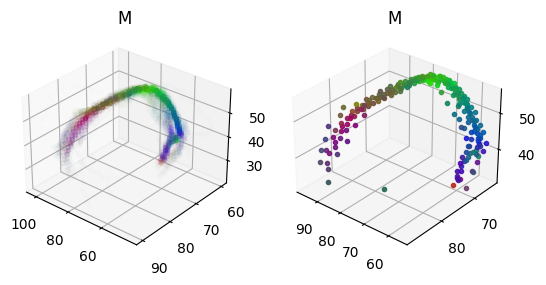

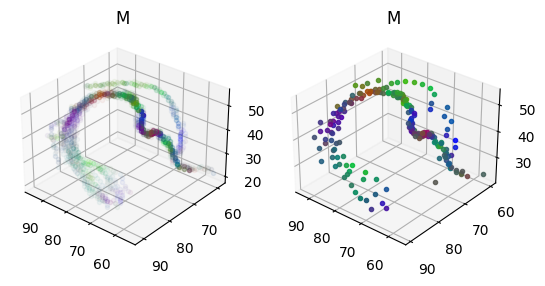

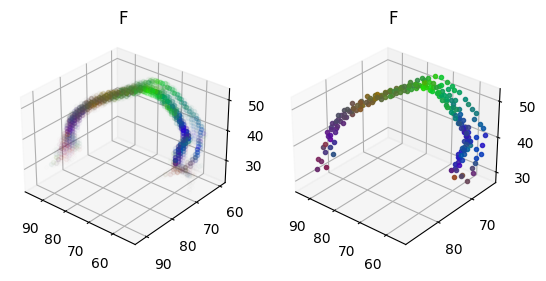

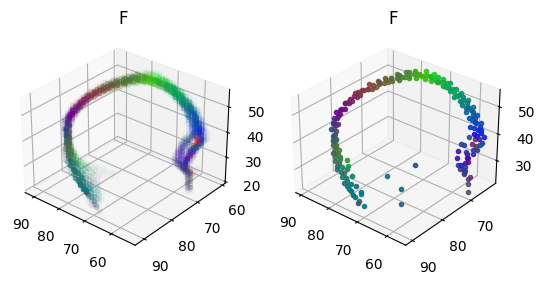

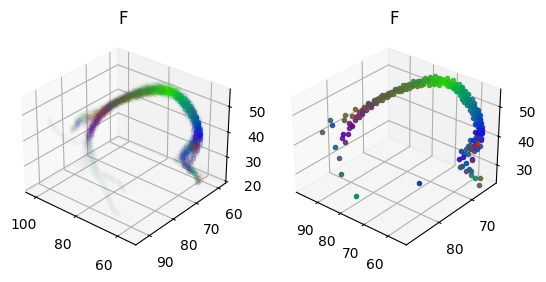

In [10]:
for i, measure in enumerate(df[tract].dropna()[:50]):
    plt.figure().add_subplot(121,projection='3d')
    measure.plot()
    plt.gca().view_init(el,az)
    plt.title(df['label'][df[tract].dropna()[:50].index[i]])
    
    plt.gcf().add_subplot(122,projection='3d')
    reconstruction_list[i].plot()
    plt.gca().view_init(el,az)
    plt.title(df['label'][df[tract].dropna()[:50].index[i]])
    
    plt.show()